# NetworkX Tutorial 1

In this tutorial we aim to introduce NetworkX basic functionality. "NetworkX is a Python toolbox for the creation, manipulation and study of the structure, dynamics and functions of complex networks." [1]

In [1]:
import networkx as nx
import numpy as np
import seaborn as sns 
%matplotlib inline

/Users/ghadaamoudi/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Create a networkx graph object
g = nx.Graph() 

In [4]:
# Add edges to to the graph object
# Each tuple represents an edge between two nodes
g.add_edges_from([
                (1,2), 
                (1,3), 
                (3,4), 
                (1,5), 
                (3,5),
                (4,2),
                (2,3),
                (3,0)])

/Users/ghadaamoudi/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


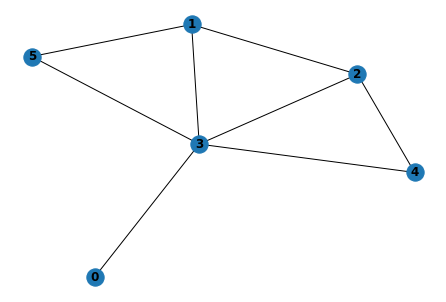

In [5]:
# Draw the resulting graph
nx.draw(g, with_labels=True, font_weight='bold')

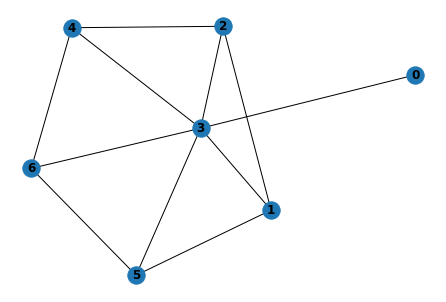

In [6]:
g.add_edge(5,6) 
g.add_edge(4,6) 
g.add_edge(3,6) 
nx.draw(g, with_labels=True, font_weight='bold')

### Importing Karate Dataset

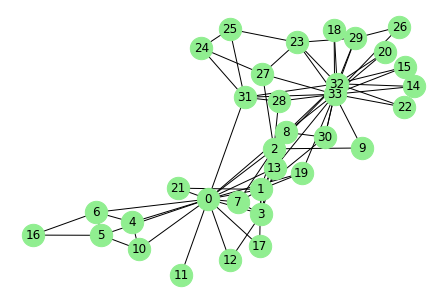

In [7]:
g = nx.karate_club_graph()
nx.draw(g, node_color='lightgreen', with_labels=True, arrowsize=40, node_size=500)

### Adding attributes to nodes and edges¶

In [8]:
cities = nx.Graph()
cities.add_edge('San Diego', 'Los Angeles', dist = 120.5)
cities.add_edge('New York', 'Los Angeles', dist = 2789.4)
cities.add_edge('New York', 'San Diego', dist = 2759.)
cities.add_edge('Boston', 'New York', dist = 215.3)
nx.get_edge_attributes(cities, 'dist')

{('San Diego', 'Los Angeles'): 120.5,
 ('San Diego', 'New York'): 2759.0,
 ('Los Angeles', 'New York'): 2789.4,
 ('New York', 'Boston'): 215.3}

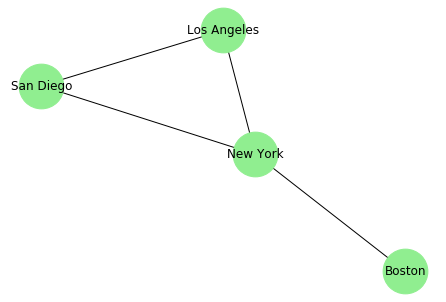

In [9]:
nx.draw(cities, node_color='lightgreen', with_labels=True, arrowsize=40, node_size=2000)

## Directed Graph

directed edges: [(1, 2), (1, 4), (2, 3), (2, 4), (4, 3)]


/Users/ghadaamoudi/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


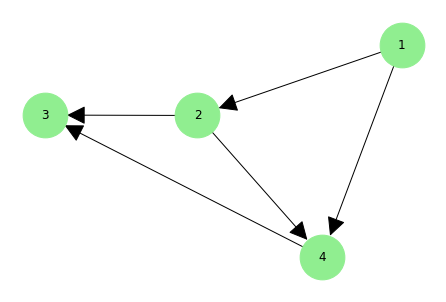

In [10]:
dg = nx.DiGraph()
dg.add_edges_from([(1,2), 
                   (2,3), 
                   (2,4), 
                   (1,4), 
                   (4,3)])
print ('directed edges:', dg.edges())
nx.draw(dg, node_color='lightgreen', with_labels=True, arrowsize=40, node_size=2000)

## Getting Data From a File

We will download facebook sample data from https://snap.stanford.edu/data/egonets-Facebook.html. The dataset is from Stanford Large Network Dataset3 (SNAP) collection. The SNAP collection includes a variety of networks such as social networks, citation networks, Twitter networks or open communities like Live Journal. The Facebook dataset contains an plain text file representing the edge list of the network. The facebook network is undirected and unweighted graph that contains users of Facebook (nodes) and their friendship relations (edges).

In [11]:
fb = nx.read_edgelist("facebook_combined.txt") 
fb_n, fb_k = fb.order(), fb.size()

print ('Nodes: ', fb_n)
print ('Edges: ', fb_k)

Nodes:  4039
Edges:  88234


In [14]:
pos_fb = nx.spring_layout(fb,iterations = 5)

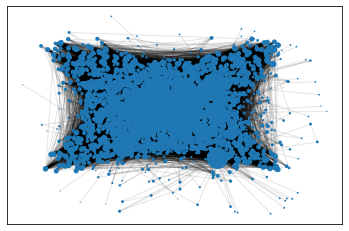

In [15]:
pr = nx.pagerank(fb, alpha = 0.85)
nsize = np.array([v for v in pr.values()])
nsize = 500*(nsize - min(nsize))/(max(nsize) - min(nsize)) 
nodes = nx.draw_networkx_nodes(fb, pos = pos_fb, node_size = nsize) 
edges = nx.draw_networkx_edges(fb, pos = pos_fb, alpha = .1)

References 

[1] Laura Igual, Santi Seguí, Introduction to Data Science, A Python Approach to Concepts, Techniques and Applications.